In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../dataset/이자보상배율최종.csv", encoding='cp949')
backtest_2011=pd.read_csv("../년도별 주식데이터/2011년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2012=pd.read_csv("../년도별 주식데이터/2012년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2013=pd.read_csv("../년도별 주식데이터/2013년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2014=pd.read_csv("../년도별 주식데이터/2014년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2015=pd.read_csv("../년도별 주식데이터/2015년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2016=pd.read_csv("../년도별 주식데이터/2016년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2017=pd.read_csv("../년도별 주식데이터/2017년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2018=pd.read_csv("../년도별 주식데이터/2018년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2019=pd.read_csv("../년도별 주식데이터/2019년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2020=pd.read_csv("../년도별 주식데이터/2020년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_kosdak=pd.read_csv("../년도별 주식데이터/코스닥주가.csv", encoding='cp949') 

In [3]:
for i in data.index:
    data.loc[i,"회계년도"]=data.loc[i,"회계년도"].replace('-12-', '-04-')
    data.loc[i,"상장일"]=data.loc[i,"상장일"].replace('-',"")
 
data.rename(columns={'회계년도':'투자일자'},inplace=True)
data

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-04-01,19941207,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-04-01,19941207,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-04-01,19941207,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-04-01,19941207,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [4]:
#logit 피처선정별 종류의 피처
data_mda = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]1주당순이익', '[제조]총자본투자효율','[제조]부가가치', '[제조]매출액순이익률', 
                 '[제조]자기자본배율', '[제조]총자본증가율','[제조]유형자산증가율',"[제조]유동비율",'[제조]비유동자산회전률','[제조]매입채무회전률' ]]
data_logit=data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)']]
data_lasso = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율','[제조]매출액순이익률',
                '[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_elastic = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율',
                     '[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_same = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]노동소득분배율','[제조]자기자본배율','[제조]현금비율','[제조]자기자본증가율',
                  '[제조]총자본증가율','[제조]재고자산증가율','[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]순운전자본회전률']]

In [5]:
# 수익성 범주인 총자본사업이익률과 1주당매출액의 4분위수에 공통적으로 있는 기업들 추출
data_logit=data_logit[(data_logit["[제조]자기자본배율"]>=data_logit["[제조]자기자본배율"].quantile(.75)) & (data_logit["[제조]이자보상배율(이자비용)"]>=data_logit["[제조]이자보상배율(이자비용)"].quantile(.75))
                                                                                            & (data_logit["[제조]현금비율"]>=data_logit["[제조]현금비율"].quantile(.75))]
# 상관계수가 높았던 총자본사업이익률 기준으로 추출

data_logit = data_logit.sort_values("[제조]이자보상배율(이자비용)",ascending=False)
data_logit

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
7807,남화토건(주),91590,2012-04-01,20120131,NaN,종합 건설업,5,9.71,5.21,7565.37,1.22,285.78,1.29,93.82,1820.56,46.09,8432098.32
7814,남화토건(주),91590,2019-04-01,20120131,NaN,종합 건설업,5,3.78,1.68,4574.50,0.50,4.07,0.86,156.86,2261.04,40.76,8432098.32
3991,(주)엠투아이코퍼레이션,347890,2020-04-01,20200729,NaN,"의료, 정밀, 광학기기 및 시계 제조업",5,54.17,20.18,4429.71,1.40,7.68,0.95,112.78,7089.46,36.19,8432098.32
7804,남화산업(주),111710,2018-04-01,20181129,NaN,스포츠 및 오락관련 서비스업,5,11.18,2.85,38424.97,0.11,3701.32,0.75,422.00,3221.83,41.86,8432098.32
7805,남화산업(주),111710,2019-04-01,20181129,NaN,스포츠 및 오락관련 서비스업,5,1.29,4.09,728.92,0.12,465.79,0.58,397.31,3277.94,44.83,8432098.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,(주)오디텍,80520,2018-04-01,20071008,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,2.64,1.20,3850.12,0.71,3.57,0.69,330.87,2006.54,60.33,24.96
6512,(주)톱텍,108230,2020-04-01,20090915,NaN,기타 기계 및 장비 제조업,5,4.61,6.44,8469.18,1.64,10.07,0.92,216.19,1894.09,64.26,24.95
1602,(주)바텍,43150,2020-04-01,20060929,NaN,"의료, 정밀, 광학기기 및 시계 제조업",5,-8.56,8.69,16447.28,1.37,4.50,0.88,92.70,2995.87,133.87,24.88
9733,인탑스(주),49070,2013-04-01,20020221,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,-4.53,9.14,122409.88,3.90,17.57,2.58,93.05,8352.02,48.79,24.80


In [6]:
# 년도별로 분류
data_logit_2011 = data_logit[data_logit["투자일자"]=='2011-04-01']
data_logit_2012 = data_logit[data_logit["투자일자"]=='2012-04-01']
data_logit_2012["투자일자"] = "2012-04-02"
data_logit_2013 = data_logit[data_logit["투자일자"]=='2013-04-01']
data_logit_2014 = data_logit[data_logit["투자일자"]=='2014-04-01']
data_logit_2015 = data_logit[data_logit["투자일자"]=='2015-04-01']
data_logit_2016 = data_logit[data_logit["투자일자"]=='2016-04-01']
data_logit_2017 = data_logit[data_logit["투자일자"]=='2017-04-01']
data_logit_2017["투자일자"] = "2017-04-03"
data_logit_2018 = data_logit[data_logit["투자일자"]=='2018-04-01']
data_logit_2018["투자일자"] = "2018-04-02"
data_logit_2019 = data_logit[data_logit["투자일자"]=='2019-04-01']
data_logit_2020 = data_logit[data_logit["투자일자"]=='2020-04-01']


<ipython-input-6-3ce73cae502e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2012["투자일자"] = "2012-04-02"
<ipython-input-6-3ce73cae502e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2017["투자일자"] = "2017-04-03"
<ipython-input-6-3ce73cae502e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [7]:
data_logit_2011_buy=data_logit_2011[data_logit_2011["상장일"]<='20110401']
data_logit_2012_buy=data_logit_2012[data_logit_2012["상장일"]<='20120401']
data_logit_2013_buy=data_logit_2013[data_logit_2013["상장일"]<='20130401']
data_logit_2014_buy=data_logit_2014[data_logit_2014["상장일"]<='20140401']
data_logit_2015_buy=data_logit_2015[data_logit_2015["상장일"]<='20150401']
data_logit_2016_buy=data_logit_2016[data_logit_2016["상장일"]<='20160401']
data_logit_2017_buy=data_logit_2017[data_logit_2017["상장일"]<='20170401']
data_logit_2018_buy=data_logit_2018[data_logit_2018["상장일"]<='20180401']
data_logit_2019_buy=data_logit_2019[data_logit_2019["상장일"]<='20190401']
data_logit_2020_buy=data_logit_2020[data_logit_2020["상장일"]<='20200401']


In [8]:
# 해당기업 순위 20위 추출
data_logit_2011_buy=data_logit_2011_buy[:20]
data_logit_2012_buy=data_logit_2012_buy[:20]
data_logit_2013_buy=data_logit_2013_buy[:20]
data_logit_2014_buy=data_logit_2014_buy[:20]
data_logit_2015_buy=data_logit_2015_buy[:20]
data_logit_2016_buy=data_logit_2016_buy[:20]
data_logit_2017_buy=data_logit_2017_buy[:20]
data_logit_2018_buy=data_logit_2018_buy[:20]
data_logit_2019_buy=data_logit_2019_buy[:20]
data_logit_2020_buy=data_logit_2020_buy[:20]

In [9]:
#트레이드 조건 주기
data_logit_2011_buy["trade"]="buy"
data_logit_2012_buy["trade"]="buy"
data_logit_2013_buy["trade"]="buy"
data_logit_2014_buy["trade"]="buy"
data_logit_2015_buy["trade"]="buy"
data_logit_2016_buy["trade"]="buy"
data_logit_2017_buy["trade"]="buy"
data_logit_2018_buy["trade"]="buy"
data_logit_2019_buy["trade"]="buy"
data_logit_2020_buy["trade"]="buy"

In [10]:
data_logit_2011

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
3914,(주)엘엑스세미콘,108320,2011-04-01,20100608,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,10.91,12.26,18536.73,13.53,10.36,1.10,256.61,2715.77,32.21,44555.210000
8239,리노공업(주),58470,2011-04-01,20011218,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,12.68,24.83,8233.30,1.69,6.45,0.89,284.29,2603.17,34.89,10134.665000
5137,(주)인포바인,115310,2011-04-01,20100209,NaN,우편 및 통신업,5,12.65,29.77,5083.18,13.16,9.18,0.39,240.44,2532.09,21.60,5157.292500
2409,(주)스마트솔루션즈,136510,2011-04-01,20111118,NaN,기타 기계 및 장비 제조업,6,55.18,19.64,3684.53,3.47,4.22,0.62,926.00,1526.56,38.37,2095.510000
83,(주)골프존뉴딘홀딩스,121440,2011-04-01,20110520,NaN,출판업,5,100.90,21.67,17568.46,2.90,29.65,0.93,197.26,5680.88,32.02,1101.460000
4512,(주)위메이드,112040,2011-04-01,20091218,NaN,출판업,5,-0.71,7.25,13789.48,0.91,4.06,0.45,196.19,6022.24,62.90,349.280000
5730,(주)컴투스홀딩스,63080,2011-04-01,20090730,NaN,출판업,5,31.83,28.78,7715.43,5.18,6.47,0.65,212.46,2464.54,28.07,344.010000
133,(주)국순당,43650,2011-04-01,20000824,NaN,음료 제조업,5,-0.86,3.60,7149.96,1.09,11.34,1.29,293.46,1942.69,58.96,167.220000
7192,(주)하이텍팜,106190,2011-04-01,20100728,NaN,의료용 물질 및 의약품 제조업,5,7.86,16.49,9771.60,4.58,2.82,0.89,84.52,1985.25,23.57,137.517143
8021,덕산하이메탈(주),77360,2011-04-01,20051014,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,27.63,26.01,4403.87,1.27,16.12,2.88,182.35,2356.53,31.21,132.110000


In [11]:
stock_2011 = pd.merge(backtest_2011,data_logit_2011_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2012 = pd.merge(backtest_2012,data_logit_2012_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2013 = pd.merge(backtest_2013,data_logit_2013_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2014 = pd.merge(backtest_2014,data_logit_2014_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2015 = pd.merge(backtest_2015,data_logit_2015_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2016 = pd.merge(backtest_2016,data_logit_2016_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2017 = pd.merge(backtest_2017,data_logit_2017_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2018 = pd.merge(backtest_2018,data_logit_2018_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2019 = pd.merge(backtest_2019,data_logit_2019_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2020 = pd.merge(backtest_2020,data_logit_2020_buy, how='left',on=['회사명','투자일자','거래소코드'])

In [12]:
stock_2011

,index,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,...,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
0,53134,(주)CMG제약,58820,2011-04-01,1710,-0.001168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54907,(주)CMG제약,58820,2011-04-04,1708,-0.001170,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55794,(주)CMG제약,58820,2011-04-05,1732,0.014052,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56489,(주)CMG제약,58820,2011-04-06,1732,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57415,(주)CMG제약,58820,2011-04-07,1735,0.001732,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232119,280536,흥구석유(주),24060,2012-03-26,1745,0.002874,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232120,281614,흥구석유(주),24060,2012-03-27,1720,-0.014327,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232121,282512,흥구석유(주),24060,2012-03-28,1720,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232122,284240,흥구석유(주),24060,2012-03-29,1735,0.008721,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
list =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]
list_grn =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]


In [14]:
for i in range(len(list)):
    for j in list[i].index:
        if j>0:
            if list[i].loc[j-1,"trade"] == "buy":
                list[i].loc[j,"trade"] = "hold"
            elif  list[i].loc[j-1,"trade"] == "hold":
                if list[i].iloc[:,1][j] == list[i].iloc[:,1][j-1]:
                    list[i].loc[j,"trade"] = "hold"
                elif list[i].iloc[:,1][j] != list[i].iloc[:,1][j-1]:
                    list[i].loc[j-1,"trade"] = "sell"
                if j== list[i].tail(n=1).index:
                    list[i].loc[j,"trade"] = "sell"
                        
for i in range(len(list)):
    list[i] = list[i][["회사명","거래소코드","투자일자","종가","일일수익률","trade"]]
    list[i] = list[i].dropna()
    list[i] = list[i].sort_values('투자일자', ascending=True)
    list[i] = list[i].reset_index(drop='index')
    list[i] = list[i].groupby("투자일자")["일일수익률"].sum()/20

In [15]:
# acc_rtn2= 1
# for i in range(len(list)):
#     list[i]=list[i].reset_index()
#     for j in list[i].index:
        
#         list[i].loc[j,"연누적수익률"] = acc_rtn2*list[i].loc[j,"일일수익률"]
#         acc_rtn2 = list[i].loc[j,"연누적수익률"]

In [16]:
stock_2011[stock_2011["trade"]=="sell"]

,index,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,...,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
3215,284856,(주)국순당,43650,2012-03-30,9350,0.007217,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
61389,284773,(주)아이에스시,95340,2012-03-30,5961,0.013431,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
83374,284993,(주)엘엑스세미콘,108320,2012-03-30,33950,0.013433,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
87124,284469,(주)오디텍,80520,2012-03-30,7347,0.001090,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
96903,284844,(주)위메이드,112040,2012-03-30,22783,0.012353,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
97153,284796,(주)위메이드맥스,101730,2012-03-30,13907,0.006368,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
102828,284601,(주)이노와이어리스,73490,2012-03-30,28100,0.008977,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
110645,284693,(주)인포바인,115310,2012-03-30,19650,-0.012563,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
124259,284713,(주)컴투스홀딩스,63080,2012-03-30,72900,0.008299,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
126259,284965,(주)케이에스피,73010,2012-03-30,4624,-0.023236,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell


In [17]:
#각 년도별 수익률 합치기
rtn =pd.concat(list)
rtn = pd.DataFrame(rtn)

In [18]:
#리밸런싱 날짜는 수익률 반영을 못하므로 제거
rtn["일일수익률"] =rtn["일일수익률"]*100
rtn =rtn.drop(index=["2011-04-01","2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
stock_rtn=rtn.reset_index()

In [19]:
stock_rtn=rtn.reset_index()
stock_rtn.columns=["투자일자","일일수익률(%)"]
stock_rtn["일일수익률"] =(stock_rtn["일일수익률(%)"]/100) +1
stock_rtn

,투자일자,일일수익률(%),일일수익률
0,2011-04-04,0.906662,1.009067
1,2011-04-05,0.583637,1.005836
2,2011-04-06,-1.110946,0.988891
3,2011-04-07,0.744100,1.007441
4,2011-04-08,0.278906,1.002789
...,...,...,...
2448,2021-03-25,-0.324460,0.996755
2449,2021-03-26,-0.194407,0.998056
2450,2021-03-29,-0.284014,0.997160
2451,2021-03-30,0.479479,1.004795


In [20]:
# stock_rtn[stock_rtn["투자일자"]=='2012-03-30']248
# stock_rtn[stock_rtn["투자일자"]=='2013-03-29'] 494
# stock_rtn[stock_rtn["투자일자"]=='2014-03-31'] 740
# stock_rtn[stock_rtn["투자일자"]=='2015-03-31'] 983
# stock_rtn[stock_rtn["투자일자"]=='2016-03-31'] 1230
# stock_rtn[stock_rtn["투자일자"]=='2017-03-31'] 1477
# stock_rtn[stock_rtn["투자일자"]=='2018-03-30'] 1718
# stock_rtn[stock_rtn["투자일자"]=='2019-03-29'] 1959
# stock_rtn[stock_rtn["투자일자"]=='2020-03-31'] 2207
# stock_rtn[stock_rtn["투자일자"]=='2021-03-31'] 2452


In [21]:
acc_rtn=1
for i in stock_rtn.index:
    
    stock_rtn.loc[i,"누적수익률"] = acc_rtn*stock_rtn.loc[i,"일일수익률"]
    acc_rtn = stock_rtn.loc[i,"누적수익률"]
        

acc_rtn_1 = 1
for i in stock_rtn.index:
    if i <= 248:
        
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_1*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_1 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 1
        
acc_rtn_2 = 1
for i in stock_rtn.index:
    if 248 < i <= 494:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_2*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_2 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 2
        
acc_rtn_3 = 1        
for i in stock_rtn.index:
    if  494< i <=740:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_3*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_3 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 3
        
acc_rtn_4 = 1       
for i in stock_rtn.index:
    if 740 < i <= 983:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_4*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_4 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 4
        
acc_rtn_5 = 1       
for i in stock_rtn.index:
    if  983< i <= 1230:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_5*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_5 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 5

acc_rtn_6 = 1
for i in stock_rtn.index:
    if 1230 < i <= 1477:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_6*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_6 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 6
        
acc_rtn_7 = 1
for i in stock_rtn.index:
    if 1477 < i <= 1718:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_7*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_7 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 7

acc_rtn_8 = 1
for i in stock_rtn.index:
    if 1718 < i <= 1959:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_8*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_8 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 8   
             
acc_rtn_9 = 1      
for i in stock_rtn.index:
    if 1959 < i <= 2207:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_9*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_9 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 9
        
acc_rtn_10 = 1       
for i in stock_rtn.index:
    if 2207 < i <= 2452:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_10*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_10 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 10
    

In [22]:
#코스닥 시작 데이터 61
# backtest_kosdak[backtest_kosdak["날짜"]=="2011-04-04"]
#코스닥 마지막 데이터 2522
#backtest_kosdak[backtest_kosdak["날짜"]=="2021-03-31"]

In [23]:
#코스닥 데이터 끌고오기
backtest_kosdak_buy= backtest_kosdak[61:2523]
backtest_kosdak_rtn = backtest_kosdak_buy.set_index("날짜")

In [24]:
backtest_kosdak_rtn =backtest_kosdak_rtn.drop(index=["2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
backtest_kosdak_rtn=backtest_kosdak_rtn.reset_index()

In [25]:
backtest_kosdak_rtn.columns = ["투자일자","코스닥종가","시가총액","코스닥수익률","코스닥시총수익률"]

In [26]:
#주식수익률과 코스닥 merge
stock_rtn_all = pd.merge(stock_rtn,backtest_kosdak_rtn,how="left",on="투자일자")


In [27]:
stock_rtn_all["코스닥수익률"]=stock_rtn_all["코스닥수익률"]*100


In [28]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률
0,2011-04-04,0.906662,1.009067,1.009067,1.009067,1.0,534.90,105835314871792,0.533774,0.005763
1,2011-04-05,0.583637,1.005836,1.014956,1.014956,1.0,537.66,106138352312272,0.515984,0.002863
2,2011-04-06,-1.110946,0.988891,1.003680,1.003680,1.0,533.98,105387016008919,-0.684447,-0.007079
3,2011-04-07,0.744100,1.007441,1.011149,1.011149,1.0,534.97,105571037939827,0.185400,0.001746
4,2011-04-08,0.278906,1.002789,1.013969,1.013969,1.0,534.20,105439281631189,-0.143933,-0.001248
...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.324460,0.996755,6.720482,1.876020,10.0,954.99,387311921085308,0.122665,0.001147
2449,2021-03-26,-0.194407,0.998056,6.707417,1.872373,10.0,956.70,388051677647507,0.179059,0.001910
2450,2021-03-29,-0.284014,0.997160,6.688367,1.867055,10.0,954.10,386977420485060,-0.271768,-0.002768
2451,2021-03-30,0.479479,1.004795,6.720436,1.876007,10.0,958.06,388660278311558,0.415051,0.004349


In [29]:

stock_rtn_all["코스닥수익률(%)"]= stock_rtn_all["코스닥수익률"]
stock_rtn_all["코스닥일일수익률"] =(stock_rtn_all["코스닥수익률(%)"]/100) +1
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률
0,2011-04-04,0.906662,1.009067,1.009067,1.009067,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338
1,2011-04-05,0.583637,1.005836,1.014956,1.014956,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160
2,2011-04-06,-1.110946,0.988891,1.003680,1.003680,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156
3,2011-04-07,0.744100,1.007441,1.011149,1.011149,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854
4,2011-04-08,0.278906,1.002789,1.013969,1.013969,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.324460,0.996755,6.720482,1.876020,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227
2449,2021-03-26,-0.194407,0.998056,6.707417,1.872373,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791
2450,2021-03-29,-0.284014,0.997160,6.688367,1.867055,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282
2451,2021-03-30,0.479479,1.004795,6.720436,1.876007,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151


In [30]:
acc_rtn=1
for i in stock_rtn_all.index:
    
    stock_rtn_all.loc[i,'코스닥누적수익률'] = acc_rtn*stock_rtn_all.loc[i,"코스닥일일수익률"]
    acc_rtn = stock_rtn_all.loc[i,"코스닥누적수익률"]
    
    
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률
0,2011-04-04,0.906662,1.009067,1.009067,1.009067,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338
1,2011-04-05,0.583637,1.005836,1.014956,1.014956,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525
2,2011-04-06,-1.110946,0.988891,1.003680,1.003680,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609
3,2011-04-07,0.744100,1.007441,1.011149,1.011149,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469
4,2011-04-08,0.278906,1.002789,1.013969,1.013969,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.324460,0.996755,6.720482,1.876020,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700
2449,2021-03-26,-0.194407,0.998056,6.707417,1.872373,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883
2450,2021-03-29,-0.284014,0.997160,6.688367,1.867055,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043
2451,2021-03-30,0.479479,1.004795,6.720436,1.876007,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415


In [31]:

for i in stock_rtn_all.index:
    if stock_rtn_all.iloc[:,5][i] == 1:
        stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥누적수익률"]
        
    elif stock_rtn_all.iloc[:,5][i] != 1:
        if stock_rtn_all.iloc[:,5][i] == stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i-1,"코스닥연누적수익률"]*stock_rtn_all.loc[i,"코스닥일일수익률"]
            
        elif stock_rtn_all.iloc[:,5][i] != stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥일일수익률"]
            
                

    

In [32]:
stock_rtn_all.iloc[:,5]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2448    10.0
2449    10.0
2450    10.0
2451    10.0
2452    10.0
Name: 투자연차, Length: 2453, dtype: float64

In [33]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률,코스닥연누적수익률
0,2011-04-04,0.906662,1.009067,1.009067,1.009067,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338,1.005338
1,2011-04-05,0.583637,1.005836,1.014956,1.014956,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525,1.010525
2,2011-04-06,-1.110946,0.988891,1.003680,1.003680,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609,1.003609
3,2011-04-07,0.744100,1.007441,1.011149,1.011149,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469,1.005469
4,2011-04-08,0.278906,1.002789,1.013969,1.013969,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.324460,0.996755,6.720482,1.876020,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700,1.730556
2449,2021-03-26,-0.194407,0.998056,6.707417,1.872373,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883,1.733655
2450,2021-03-29,-0.284014,0.997160,6.688367,1.867055,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043,1.728943
2451,2021-03-30,0.479479,1.004795,6.720436,1.876007,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415,1.736119


In [34]:
stock_rtn_all["코스닥연누적수익률(%)"]=(stock_rtn_all["코스닥연누적수익률"]-1)*100
stock_rtn_all["누적수익률(%)"]= (stock_rtn_all["누적수익률"]-1)*100
stock_rtn_all["코스닥누적수익률(%)"]= (stock_rtn_all["코스닥누적수익률"]-1)*100
stock_rtn_all["연누적수익률(%)"]= (stock_rtn_all["연누적수익률"]-1)*100


In [35]:
stock_rtn_all =stock_rtn_all[['투자일자', '일일수익률(%)',"누적수익률(%)","연누적수익률(%)", '코스닥종가', '코스닥수익률(%)', '코스닥누적수익률(%)',"코스닥연누적수익률(%)",'투자연차']]


In [36]:
stock_rtn_all.to_csv("./dataset/안정성범주.csv",encoding='cp949')

In [37]:
stock_rtn_all

,투자일자,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
0,2011-04-04,0.906662,0.906662,0.906662,534.90,0.533774,0.533774,0.533774,1.0
1,2011-04-05,0.583637,1.495591,1.495591,537.66,0.515984,1.052513,1.052513,1.0
2,2011-04-06,-1.110946,0.368030,0.368030,533.98,-0.684447,0.360862,0.360862,1.0
3,2011-04-07,0.744100,1.114868,1.114868,534.97,0.185400,0.546931,0.546931,1.0
4,2011-04-08,0.278906,1.396883,1.396883,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.324460,572.048178,87.602017,954.99,0.122665,77.769983,73.055596,10.0
2449,2021-03-26,-0.194407,570.741669,87.237306,956.70,0.179059,78.088297,73.365468,10.0
2450,2021-03-29,-0.284014,568.836671,86.705526,954.10,-0.271768,77.604311,72.894317,10.0
2451,2021-03-30,0.479479,572.043602,87.600740,958.06,0.415051,78.341459,73.611916,10.0


In [38]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stock_rtn_all["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stock_rtn_all["일일수익률(%)"] - stock_rtn_all["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print( 'Sharpe ratio: %.2f' % Sharpe )

Sharpe ratio: 0.04


In [39]:
Sharpe *np.sqrt(252)

0.6276263355913028

In [40]:
#mdd 
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.8672876086460385

In [41]:
cagr = (stock_rtn_all
        ["누적수익률(%)"]**(1/10))-1
print(cagr*100)


0       -0.975070
1        4.107321
2       -9.512568
3        1.093293
4        3.398919
          ...    
2448    88.687557
2449    88.644418
2450    88.581358
2451    88.687406
2452    88.780189
Name: 누적수익률(%), Length: 2453, dtype: float64


In [42]:
Std

1.3778055079769396

In [43]:
stock_rtn_all=stock_rtn_all.set_index('투자일자')

In [44]:
rtn_2011 = stock_rtn_all[stock_rtn_all["투자연차"]==1]
rtn_2012 = stock_rtn_all[stock_rtn_all["투자연차"]==2]
rtn_2013 = stock_rtn_all[stock_rtn_all["투자연차"]==3]
rtn_2014 = stock_rtn_all[stock_rtn_all["투자연차"]==4]
rtn_2015 = stock_rtn_all[stock_rtn_all["투자연차"]==5]
rtn_2016 = stock_rtn_all[stock_rtn_all["투자연차"]==6]
rtn_2017 = stock_rtn_all[stock_rtn_all["투자연차"]==7]
rtn_2018 = stock_rtn_all[stock_rtn_all["투자연차"]==8]
rtn_2019 = stock_rtn_all[stock_rtn_all["투자연차"]==9]
rtn_2020 = stock_rtn_all[stock_rtn_all["투자연차"]==10]

In [45]:
rtn_2011

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.906662,0.906662,0.906662,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.583637,1.495591,1.495591,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-1.110946,0.368030,0.368030,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.744100,1.114868,1.114868,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,0.278906,1.396883,1.396883,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-0.756283,31.718794,31.718794,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.285648,31.342542,31.342542,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,0.598218,32.128257,32.128257,519.56,-0.417833,-2.349359,-2.349359,1.0


In [46]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2011["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2011["일일수익률(%)"] - rtn_2011["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2011["누적수익률(%)"].min())-(100+rtn_2011["누적수익률(%)"].max()))/(rtn_2011["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2011


-0.33435216813658847
1.7389430565820192
Sharpe ratio: 0.07
1.0674549570089578


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.906662,0.906662,0.906662,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.583637,1.495591,1.495591,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-1.110946,0.368030,0.368030,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.744100,1.114868,1.114868,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,0.278906,1.396883,1.396883,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-0.756283,31.718794,31.718794,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.285648,31.342542,31.342542,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,0.598218,32.128257,32.128257,519.56,-0.417833,-2.349359,-2.349359,1.0


In [47]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012


-0.2921012561270262
1.1961374096133868
Sharpe ratio: 0.06
0.9552473896389547


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-0.852739,29.564751,-0.852739,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-2.091081,26.855446,-2.925989,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,-0.494280,26.228425,-3.405806,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,0.726050,27.144906,-2.704485,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-2.416681,24.072219,-5.055807,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,-0.138605,62.673012,24.482805,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,-0.828788,61.324798,23.451107,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,-0.330401,60.791779,23.043223,548.72,-0.214584,2.688501,5.159065,2.0


In [48]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2013["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2013["일일수익률(%)"] - rtn_2013["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2013["누적수익률(%)"].min())-(100+rtn_2013["누적수익률(%)"].max()))/(rtn_2013["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2013


-0.2108050971694502
1.1733913560369849
Sharpe ratio: 0.04
0.6302590733673696


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2013-04-02,-0.063473,65.149922,-0.063473,552.83,-0.205787,3.653749,-0.205787,3.0
2013-04-03,0.146474,65.391824,0.082908,557.96,0.927953,4.615606,0.720256,3.0
2013-04-04,-0.344815,64.821529,-0.262192,555.23,-0.489282,4.103740,0.227449,3.0
2013-04-05,-1.276013,62.718384,-1.534860,547.51,-1.390415,2.656267,-1.166128,3.0
2013-04-08,-3.101556,57.671583,-4.588811,528.78,-3.420942,-0.855545,-4.547178,3.0
...,...,...,...,...,...,...,...,...
2014-03-25,-1.310009,79.975832,8.908072,539.05,-1.200513,1.070045,-2.693287,3.0
2014-03-26,-0.049651,79.886473,8.853998,544.13,0.942399,2.022528,-1.776269,3.0
2014-03-27,-0.915617,78.239401,7.857312,541.46,-0.490692,1.521912,-2.258245,3.0


In [49]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2014["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2014["일일수익률(%)"] - rtn_2014["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2014["누적수익률(%)"].min())-(100+rtn_2014["누적수익률(%)"].max()))/(rtn_2014["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2014


-0.22650092969503083
0.8448169424498986
Sharpe ratio: 0.03
0.4446739918286422


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2014-04-02,1.251482,82.774376,1.251482,557.65,1.560793,3.129309,1.560793,4.0
2014-04-03,-0.084767,82.619444,1.165655,557.01,-0.114767,3.010951,1.444234,4.0
2014-04-04,0.327566,83.217644,1.497039,560.44,0.615788,3.645280,2.068915,4.0
2014-04-07,-0.070524,83.088432,1.425460,554.23,-1.108058,2.496830,0.937933,4.0
2014-04-08,-0.623171,81.947479,0.793406,554.07,-0.028869,2.467240,0.908793,4.0
...,...,...,...,...,...,...,...,...
2015-03-25,0.101600,124.007871,24.093593,651.05,1.430196,20.402290,18.571064,4.0
2015-03-26,-0.385209,123.144973,23.615574,642.53,-1.308655,18.826639,17.019378,4.0
2015-03-27,0.138197,123.453354,23.786407,640.12,-0.375080,18.380944,16.580462,4.0


In [50]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2015["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2015["일일수익률(%)"] - rtn_2015["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2015["누적수익률(%)"].min())-(100+rtn_2015["누적수익률(%)"].max()))/(rtn_2015["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2015


-0.22774760027963445
1.3627303157941753
Sharpe ratio: -0.00
-0.0077655435065313635


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2015-04-02,-0.153497,126.121167,-0.153497,650.57,0.052289,20.361629,0.052289,5.0
2015-04-03,1.355453,129.186132,1.199875,658.04,1.148224,21.743650,1.201113,5.0
2015-04-06,1.173826,131.876378,2.387785,662.15,0.624582,22.504039,1.833197,5.0
2015-04-07,0.356186,132.702288,2.752476,666.83,0.706788,23.369883,2.552943,5.0
2015-04-08,-0.258530,132.100683,2.486830,668.03,0.179956,23.591895,2.737493,5.0
...,...,...,...,...,...,...,...,...
2016-03-25,-0.047260,137.212196,4.743879,683.20,-0.445895,26.398489,5.070514,5.0
2016-03-28,-1.040652,134.743643,3.653860,676.51,-0.979215,25.160775,4.041647,5.0
2016-03-29,-0.240900,134.178145,3.404158,686.50,1.476697,27.009020,5.578026,5.0


In [51]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2016["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2016["일일수익률(%)"] - rtn_2016["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2016["누적수익률(%)"].min())-(100+rtn_2016["누적수익률(%)"].max()))/(rtn_2016["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2016


-0.16177262870265655
1.0082141694178404
Sharpe ratio: 0.10
1.549632689379302


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2016-04-04,0.881995,142.038943,0.881995,696.98,0.910684,28.516656,0.910684,6.0
2016-04-05,0.946722,144.330378,1.837067,695.70,-0.183649,28.280636,0.725362,6.0
2016-04-06,-0.888061,142.160576,0.932692,694.03,-0.240046,27.972703,0.483574,6.0
2016-04-07,0.179957,142.596361,1.114327,697.13,0.446667,28.544315,0.932401,6.0
2016-04-08,0.208653,143.102546,1.325305,697.10,-0.004303,28.538783,0.928057,6.0
...,...,...,...,...,...,...,...,...
2017-03-27,-0.534982,169.919782,12.502747,607.07,-0.182512,11.938085,-12.106734,6.0
2017-03-28,0.740582,171.918759,13.335922,612.28,0.858221,12.898760,-11.352416,6.0
2017-03-29,0.019403,171.971520,13.357913,613.63,0.220487,13.147688,-11.156959,6.0


In [52]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2017["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2017["일일수익률(%)"] - rtn_2017["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2017["누적수익률(%)"].min())-(100+rtn_2017["누적수익률(%)"].max()))/(rtn_2017["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2017


-0.2277151731097987
1.057159408708342
Sharpe ratio: -0.06
-0.8886493157508453


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2017-04-04,1.353739,177.522529,1.353739,625.49,-0.482085,13.639005,-0.482085,7.0
2017-04-05,0.599837,179.187212,1.961696,630.17,0.748213,14.489268,0.262521,7.0
2017-04-06,-0.032625,179.096128,1.928432,630.46,0.046019,14.541955,0.308662,7.0
2017-04-07,-0.052436,178.949782,1.874985,633.32,0.453637,15.061560,0.763699,7.0
2017-04-10,-2.262062,172.639765,-0.429491,619.41,-2.196362,12.534391,-1.449437,7.0
...,...,...,...,...,...,...,...,...
2018-03-26,2.670290,228.096145,19.823681,853.69,2.893887,55.098375,35.825431,7.0
2018-03-27,0.668484,230.289415,20.624684,858.84,0.603263,56.034027,36.644816,7.0
2018-03-28,-0.957328,227.127462,19.469910,850.97,-0.916352,54.604205,35.392668,7.0


In [53]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2018["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2018["일일수익률(%)"] - rtn_2018["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2018["누적수익률(%)"].min())-(100+rtn_2018["누적수익률(%)"].max()))/(rtn_2018["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))


-0.23398500986600074
1.3780815237453827
Sharpe ratio: 0.06
0.9238341712819474


In [54]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2019["일일수익률(%)"] - rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2019["누적수익률(%)"].min())-(100+rtn_2019["누적수익률(%)"].max()))/(rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2019


-0.40775482045513234
2.1324761125947718
Sharpe ratio: 0.06
0.9711296932249073


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2019-04-02,0.258090,238.542032,0.258090,739.57,0.374588,33.501572,0.374588,9.0
2019-04-03,0.815437,241.302628,1.075631,749.30,1.315629,35.257957,1.695145,9.0
2019-04-04,0.812883,244.077021,1.897259,751.58,0.304284,35.669526,2.004587,9.0
2019-04-05,1.517780,249.299354,3.443835,751.71,0.017297,35.692992,2.022231,9.0
2019-04-08,1.087902,253.099387,4.569202,751.92,0.027936,35.730900,2.050732,9.0
...,...,...,...,...,...,...,...,...
2020-03-25,4.963716,219.923537,-5.255715,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,1.976540,226.246953,-3.383056,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,2.482171,234.344961,-0.984858,522.83,1.204003,-5.622691,-29.041408,9.0


In [55]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2020["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2020["일일수익률(%)"] - rtn_2020["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2020["누적수익률(%)"].min())-(100+rtn_2020["누적수익률(%)"].max()))/(rtn_2020["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2020


-0.4651709243365448
1.4006433188631764
Sharpe ratio: 0.02
0.37135456066734457


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2020-04-02,1.489610,263.567025,1.489610,567.70,2.874021,5.676519,2.874021,10.0
2020-04-03,1.467681,268.903030,2.979154,573.01,0.935353,6.664968,3.836257,10.0
2020-04-06,4.025114,283.751797,7.124182,597.21,4.223312,11.169762,8.221586,10.0
2020-04-07,1.275121,288.645097,8.490145,606.90,1.622545,12.973542,9.977530,10.0
2020-04-08,-0.335732,287.340290,8.125908,607.37,0.077443,13.061031,10.062699,10.0
...,...,...,...,...,...,...,...,...
2021-03-25,-0.324460,572.048178,87.602017,954.99,0.122665,77.769983,73.055596,10.0
2021-03-26,-0.194407,570.741669,87.237306,956.70,0.179059,78.088297,73.365468,10.0
2021-03-29,-0.284014,568.836671,86.705526,954.10,-0.271768,77.604311,72.894317,10.0


In [56]:
stcok_rtn_2019=stock_rtn_all[stock_rtn_all["투자연차"]!=10]
stcok_rtn_2019

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.906662,0.906662,0.906662,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.583637,1.495591,1.495591,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-1.110946,0.368030,0.368030,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.744100,1.114868,1.114868,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,0.278906,1.396883,1.396883,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2020-03-25,4.963716,219.923537,-5.255715,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,1.976540,226.246953,-3.383056,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,2.482171,234.344961,-0.984858,522.83,1.204003,-5.622691,-29.041408,9.0


In [57]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stcok_rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stcok_rtn_2019["일일수익률(%)"] - stcok_rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+stcok_rtn_2019["누적수익률(%)"].min())-(100+stcok_rtn_2019["누적수익률(%)"].max()))/(stcok_rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
cagr = (stcok_rtn_2019
        ["누적수익률(%)"]**(1/9))-1
print(cagr*100)


-0.8035975522636005
1.3740970841852784
Sharpe ratio: 0.04
0.657148028979773
투자일자
2011-04-04    -1.082823
2011-04-05     4.573979
2011-04-06   -10.512013
2011-04-07     1.215505
2011-04-08     3.783638
                ...    
2020-03-25    82.075878
2020-03-26    82.650264
2020-03-27    83.365358
2020-03-30    84.287864
2020-03-31    85.353542
Name: 누적수익률(%), Length: 2208, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from c

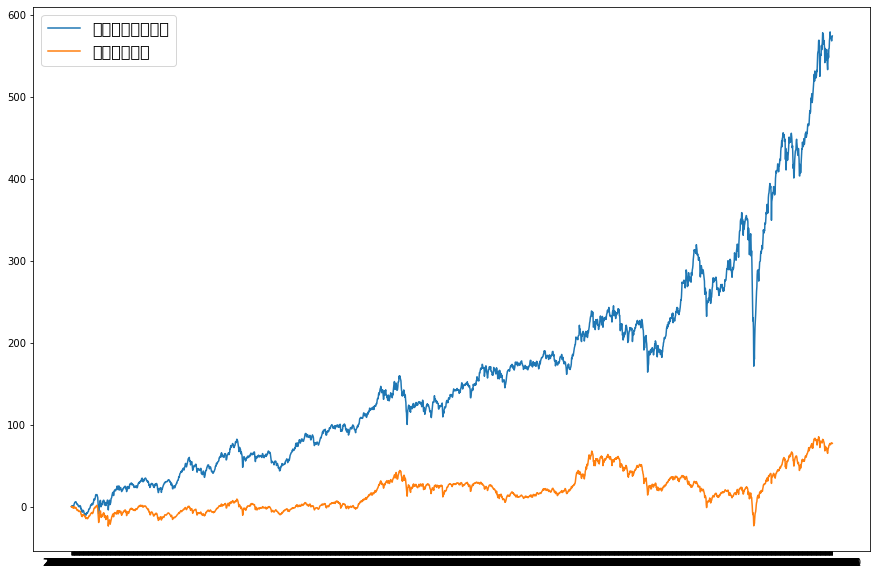

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(stock_rtn_all["누적수익률(%)"],label='포트폴리오수익률')
plt.plot(stock_rtn_all["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)

plt.show()

In [59]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(100,200)})

fig, axes = plt.subplots(5,2)
# sns.lineplot(x=rtn_2011['투자일자'],y='수익률',data=rtn_2011[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[0,0].plot(rtn_2011[["연누적수익률(%)","코스닥연누적수익률(%)"]])

axes[0,1].plot(rtn_2012[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[1,0].plot(rtn_2013[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[1,1].plot(rtn_2014[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[2,0].plot(rtn_2015[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[2,1].plot(rtn_2016[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[3,0].plot(rtn_2017[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[3,1].plot(rtn_2018[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[4,0].plot(rtn_2019[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[4,1].plot(rtn_2020[["연누적수익률(%)","코스닥연누적수익률(%)"]])

In [61]:
stock_rtn_all.to_csv("./dataset/안정성범주.csv",encoding='cp949')